# Exploring the significant determinants of Airbnb pricing across New York City's diverse neighborhoods

# 1. Project One

## 1.1. Introduction

Airbnb has revolutionized the way travelers find and book accommodations, offering a personalized and often more affordable alternative to traditional hotels. In the bustling metropolis of New York City, a global hub for tourism, business, and culture, the Airbnb market is particularly dynamic. With thousands of listings scattered across the city's diverse neighborhoods, the platform presents a rich dataset for analyzing the various factors that influence rental pricing. Using Airbnb in New York City dataset in Kaggle, scraped dataset on Zip Code by Population, and a shapefile on New York City Zip Code, this project delves into the world of Airbnb pricing in New York City, seeking to understand what drives the cost of a listing and how these price points reflect the city's economic landscape.

The project begins with a process of data cleaning and loading. The initial stage involves filtering out any missing or duplicate values, ensuring that the subsequent analysis rests on an accurate foundation. Recognizing that outliers can significantly skew results, particularly in a varied market like New York, this project takes the critical step of removing extreme values. This approach focuses on capturing the average Airbnb experience, which is more representative of the general user's encounter with the platform.

With the data pruned to reflect the core market, the project moves on to provide a statistical overview of the cleaned dataset. Key variables such as price, minimum nights, number of reviews, reviews per month, host listings count, and availability are distilled into summary statistics. This step not only quantifies the central tendencies and dispersion of these pivotal factors but also offers a preliminary glimpse into the characteristics of a typical Airbnb listing in New York City. These metrics lay the groundwork for deeper exploration and allow for the early detection of potential patterns or anomalies worth investigating further.

Beyond numerical summaries, the project employs a variety of visual tools to illustrate the data's narratives. Through histograms, line plots, scatter plots, and heatmaps, the analysis paints a picture of the Airbnb ecosystem in New York City. These visualizations are particularly adept at conveying complex information in an accessible manner, highlighting trends, correlations, and geographical distributions that might otherwise be obscured in raw tables or figures. By examining price distributions, minimum stay requirements, host activity, and other factors across the five boroughs, the project maps the contours of the city's short-term rental market. Such insights are invaluable not only for Airbnb hosts setting competitive prices but also for policymakers understanding the housing market's nuances.

In sum, this project is an investigation into what shapes the cost of temporary accommodations in a city known for its high living expenses and how the short-term rental market fits into the broader economic fabric of New York City. Through this study, we hope to explore the factors that Airbnb hosts and guests weigh most heavily in their decision-making and how these preferences ripple through the marketplace.

## 1.2. Data Cleaning/Loading

In [62]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

In [63]:
# read the data
df = pd.read_csv('AB_NYC_2019.csv')

In [64]:
# drop rows with missing values
df.dropna(inplace=True)

In [65]:
# drop rows with duplicate values
df.drop_duplicates(inplace=True)

In this project, I decided to drop outliers for Price, Minimum Nights, Number of Reviews, Reviews per Month, Host Listings Count to narrow down the dataset to include listings that are most representative of the typical Airbnb experience in NYC. By removing listings that are either free or too expensive, those with long-term rentals, those that are inactive or overly popular, and those managed by hosts with a lot of properties, we focus on the "average" Airbnb experience. This will help reduce the impact of extreme values or unrepresentative listings, allowing for a more accurate examination of the factors that influence Airbnb prices.

In [66]:
# drop outliers
condition = (df['price'] > 0) & (df['price'] < 500) & \
            (df['minimum_nights'] > 0) & (df['minimum_nights'] < 10) & \
            (df['number_of_reviews'] > 0) & (df['number_of_reviews'] < 100) & \
            (df['reviews_per_month'] > 0) & (df['reviews_per_month'] < 10) & \
            (df['calculated_host_listings_count'] < 10)

df = df[condition]

Note: After dropping missing values, duplicate values, and outliers, our dataset went down from 48895 observations to 30071 observations.

## 1.3. Summary Statistics Tables

In [67]:
columns_of_interest = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
                'calculated_host_listings_count', 'availability_365']

df[columns_of_interest].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,30071.000000,30071.000000,30071.000000,30071.000000,30071.000000,30071.000000
mean,127.001164,2.651924,18.997406,1.258758,1.632370,94.990689
std,82.433190,1.645601,22.920498,1.485845,1.326069,122.503514
min,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,67.000000,1.000000,3.000000,0.180000,1.000000,0.000000
50%,100.000000,2.000000,9.000000,0.680000,1.000000,26.000000
75%,160.000000,3.000000,26.000000,1.850000,2.000000,174.000000
max,499.000000,9.000000,99.000000,9.930000,9.000000,365.000000


The data above reflects a diverse marketplace for accommodations. The average price of //$127 suggests a typical cost for renting an Airbnb in New York City, while the significant standard deviation of //82 indicates a variety of options from budget-friendly to premium listings. A majority of the listings require short stays, on average for 2 to 3 nights, catering to short visits for tourists. The number of reviews typically hovers around 19 reviews with a significant standard deviation of 22 reviews, while the average review per month typicall hovers around 1.3 review with a significant standard deviation of 1.5 reviews, singalling a mix of well-known and less popular offerings. The average host listings count is approximately 1 to 2 listings, implying that most hosts are individual hosts, yet there still exist multiple-property hosts in the market. On average, most listings are only available for 95 days in a year, with some hosts offering year-around access to their properties and others choosing selective rental periods, indicating a broad range of flexible supply, possibly adjusting for demand fluctuations or personal use. This marketplace is characterized by a dynamic equilibrium, balancing the diversity of consumer needs with the strategic positioning of suppliers.

## 1.4. Plots, Histograms, Figures

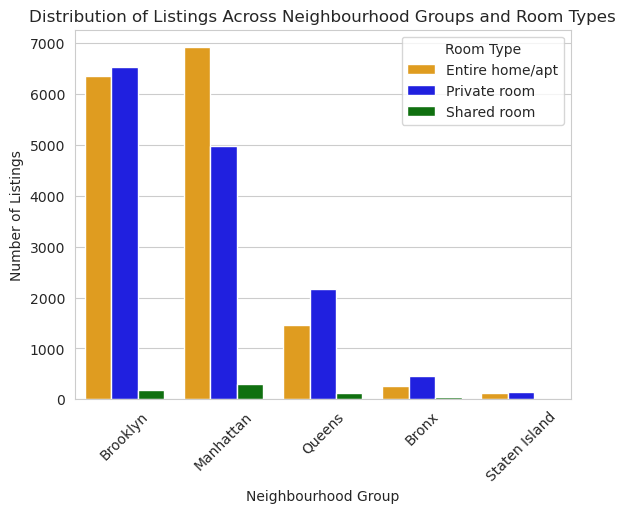

In [68]:
# plot the distribution of listings across neighbourhood groups and room types
room_type_order = ['Entire home/apt', 'Private room', 'Shared room']
neighbourhood_group_order = df['neighbourhood_group'].value_counts().index.tolist()
palette = {'Private room': 'blue', 'Entire home/apt': 'orange', 'Shared room': 'green'}

sns.countplot(x='neighbourhood_group', hue='room_type', data=df, order=neighbourhood_group_order,
              hue_order=room_type_order, palette=palette)
plt.title('Distribution of Listings Across Neighbourhood Groups and Room Types')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.legend(title='Room Type')
plt.xticks(rotation=45)
plt.show()

The bar graph represents the distribution of Airbnb listings across different neighborhood groups in New York City, broken down by the type of room being offered: entire home or apartment, private room, or shared room. This shows the supply side of the short-term rental market, with Manhattan and Brooklyn having the highest number of listings, indicative of a strong supplier presence and potentially high demand from visitors. Manhattan has a particularly high number of entire homes or apartments available, close to 7000 listings, which may reflect a higher tourist influx or a preference for privacy, thereby commanding higher prices. In contrast, the Bronx and Staten Island show significantly fewer listings, which could suggest lower demand or a less mature market for short-term rentals. This distribution highlights the variability in the types of accommodations that hosts are offering and the economic vitality of the short-term rental market across different areas of the city.

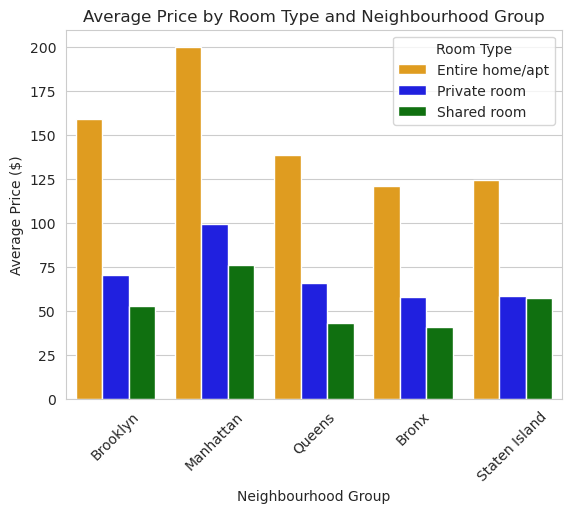

In [69]:
# plot the average price by room type and neighbourhood group
grouped_price = df.groupby(['room_type', 'neighbourhood_group'])['price'].mean().reset_index()
sns.barplot(x='neighbourhood_group', y='price', hue='room_type', data=grouped_price, 
            order=neighbourhood_group_order, hue_order=room_type_order, palette=palette)
plt.title('Average Price by Room Type and Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price ($)')
plt.legend(title='Room Type')
plt.xticks(rotation=45)
plt.show()

This bar plot illustrates the average rental price for different types of Airbnb accommodations across New York City's neighborhood groups. This provides an insight into the pricing strategy of hosts based on room offerings and location. Entire homes or apartments generally command the highest prices ranging from under \\$200, particularly in Manhattan, which suggests a premium on privacy and space in this densely populated and tourist-heavy area. Private rooms with prices ranging from under \\$100, while less expensive than entire homes, still follow the same pattern of being most expensive in Manhattan. Shared rooms with prices ranging from under \\$75, as the most budget-friendly option, maintain the lowest prices across all neighborhoods. Economically, this indicates a tiered market where consumers can choose accommodations based on their budget and preferences, and where suppliers adjust their prices according to the perceived value and demand of their offerings in each area.

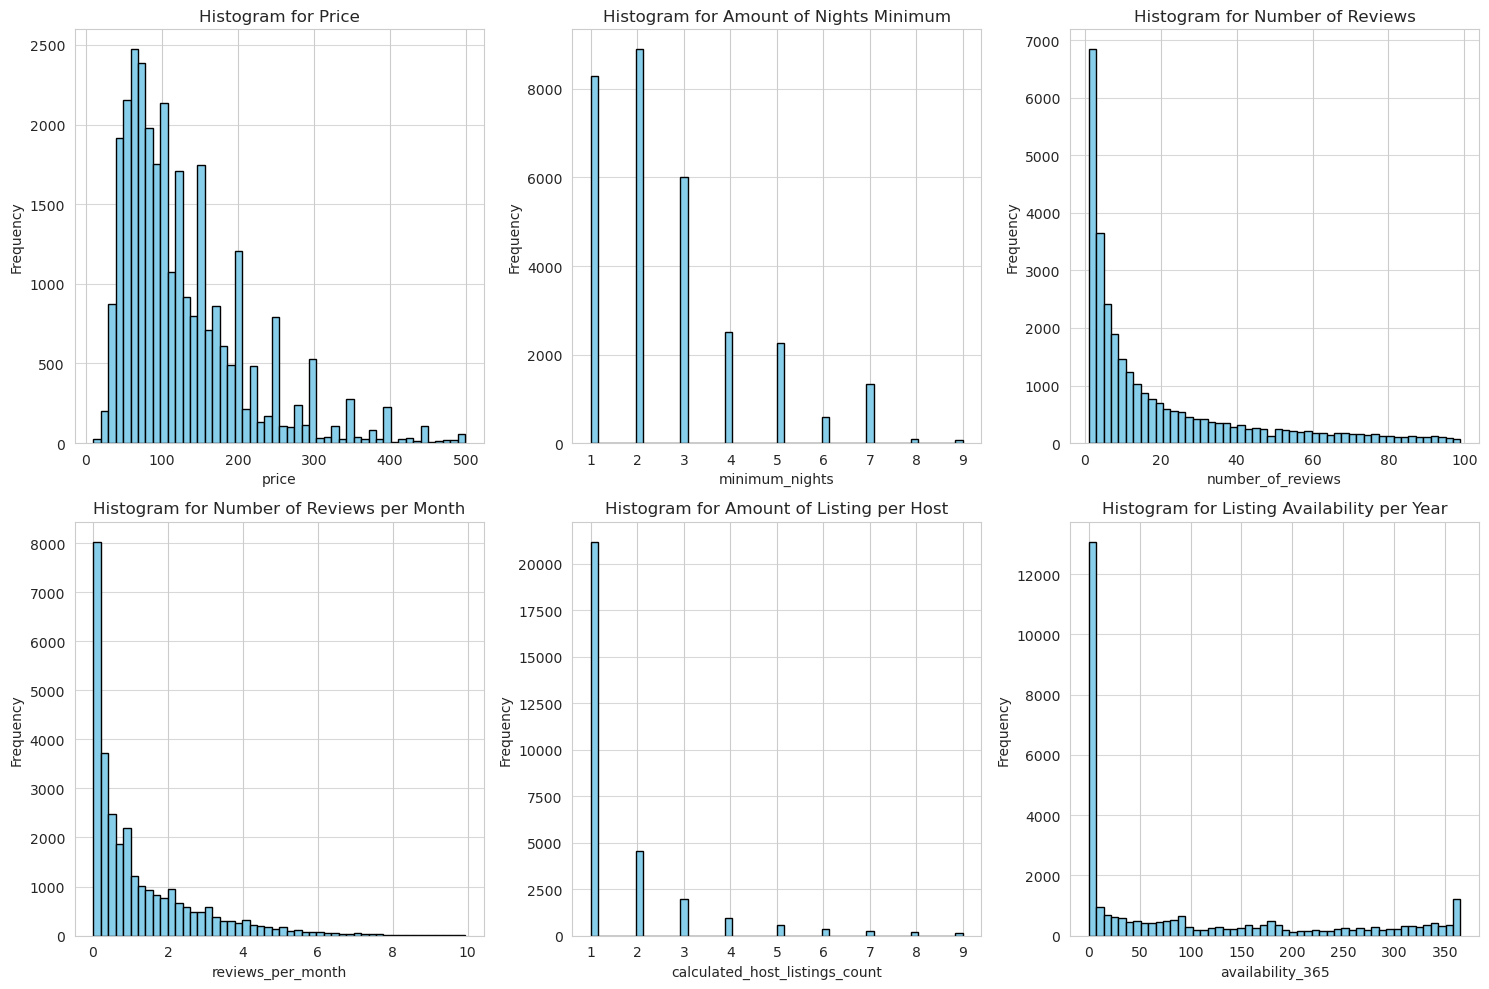

In [70]:
# plot histograms
columns = ['price', 'minimum_nights', 'number_of_reviews',
           'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

titles = ['Histogram for Price', 'Histogram for Amount of Nights Minimum',
          'Histogram for Number of Reviews', 'Histogram for Number of Reviews per Month',
          'Histogram for Amount of Listing per Host', 'Histogram for Listing Availability per Year']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()  

for i, col in enumerate(columns):
    axs[i].hist(df[col], bins=50, color='skyblue', edgecolor='black')
    axs[i].set_title(titles[i])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

The "Histogram for Price" depicts the distribution of the price points at which Airbnb listings are offered. Most listings are concentrated at the lower end of the price range from below \\$150, indicating a market geared more towards affordability. This suggests that budget options are abundant, which may be a response to a higher demand for economically priced accommodations, or it may reflect a strategy by hosts to remain competitive.

The "Histogram for Amount of Nights Minimum" shows the frequency of listings according to their minimum stay requirements. A significant number of listings have a very short minimum stay, typically 1 to 2 nights, which caters to the flexibility desired by short-term travelers. This implies a market dynamic where hosts are accommodating transient guests, such as tourists or business travelers, who prefer not to commit to long stays.

The "Histogram for Number of Reviews" indicates how many reviews various listings have received. The steep decline in frequency as the number of reviews increases suggests that while many listings have been reviewed, only a few accumulate a high number of reviews. Most listings only receive 10 reviews or under. This may point to a competitive market where only well-established or superior listings consistently attract enough guests to garner numerous reviews.

The "Histogram for Number of Reviews per Month" offers insight into the frequency of reviews listings receive on a monthly basis. The concentration of listings with fewer monthly reviews implies that while many properties are booked and reviewed, a rapid turnover rate is not common. Most listings only receive 1 review or under per month. This could reflect a pattern where guests are either opting for a diverse array of rentals, thus spreading reviews across the market, or where repeat business is limited.

In the "Histogram for Amount of Listing per Host," we see how many listings each host manages. The data skews heavily towards hosts with just 1 property, highlighting that the market is predominantly made up of individuals rather than large-scale operators. This could reflect a market that is accessible and appealing to small-scale entrepreneurs or homeowners looking to supplement their income.

Finally, the "Histogram for Listing Availability per Year" showcases how many days per year listings are available. A large number of listings show full-year availability, suggesting either a surplus of dedicated rental properties or a market with hosts willing to offer their properties year-round, possibly in an attempt to maximize occupancy and revenue.

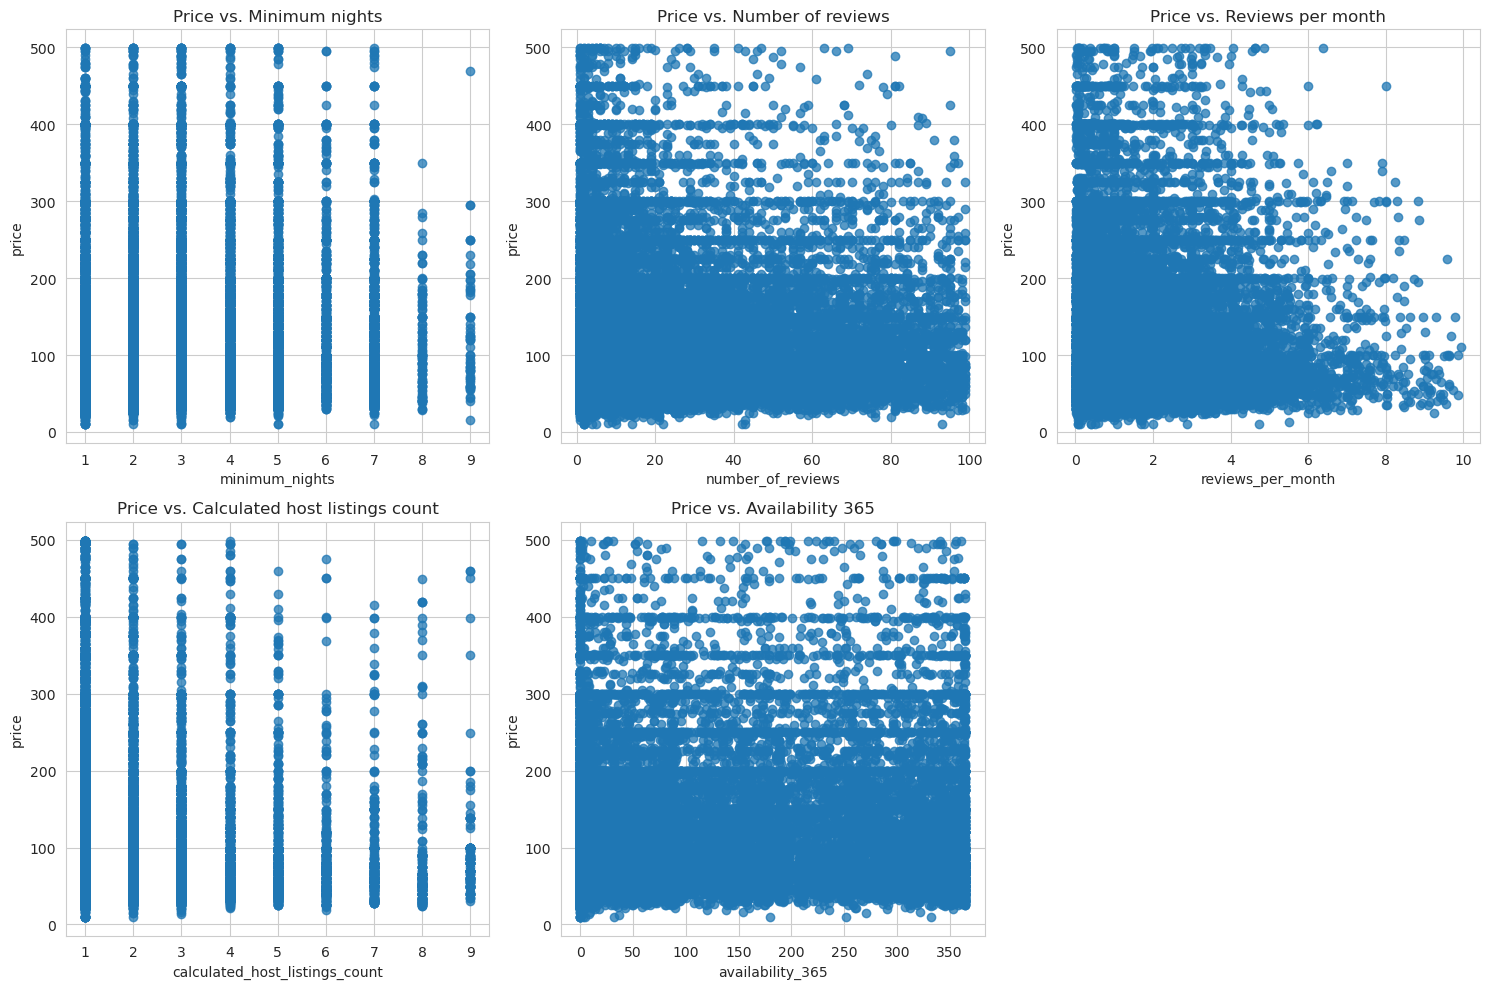

In [71]:
# plot scatter plots
x_variables = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 
               'calculated_host_listings_count', 'availability_365']

fig, axs = plt.subplots(2, 3, figsize=(15, 10))  

for i, ax in enumerate(axs.flat):
    if i < len(x_variables):  
        ax.scatter(df[x_variables[i]], df['price'], alpha=0.75)
        ax.set_title(f'Price vs. {x_variables[i].replace("_", " ").capitalize()}')
        ax.set_xlabel(x_variables[i])
        ax.set_ylabel('price')
        ax.grid(True)
    else:
        ax.set_visible(False)  

plt.tight_layout()
plt.show()

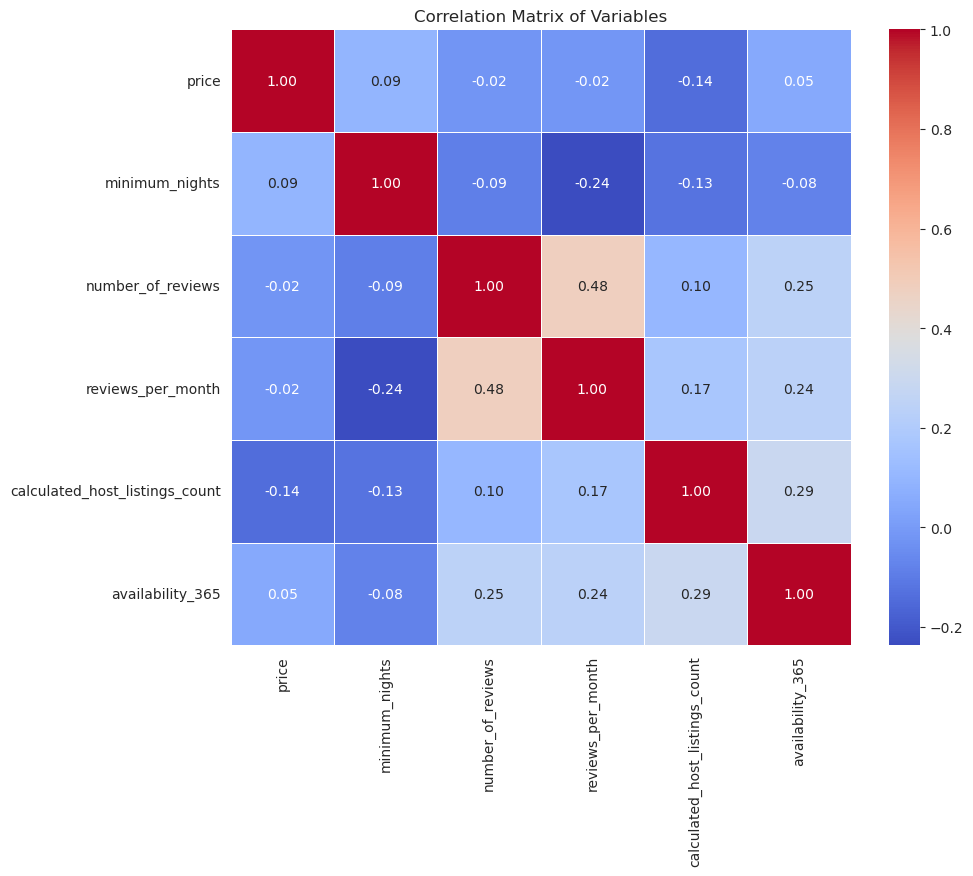

In [72]:
# plot correlation matrix
correlation_matrix = df[columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Variables')
plt.show()

The heatmap displays the relationships between various Airbnb listing characteristics: while most variables show little correlation, the number of reviews is moderately correlated with reviews per month, which makes sense since higher review means higher popularity, which translates into higher reviews per month. We can also observe that the host listings count and availability are slightly correlated, suggesting that hosts with more listings tend to offer greater year-round availability, which might be due to the increased availability of their properties. According to this heatmap, the most influential factor of Airbnb price is host listings count, suggesting that hosts with higher listings tend to charge higher prices.

# 2. Project Two

## 2.1. The Message

This paper identifies and analyzes key factors impacting Airbnb pricing in New York City, revealing that location desirability, regulatory environments, and host profiles are crucial in influencing rental costs. Through our exploration, we establish that a nuanced blend of demographic density, host activity, and accommodation type plays a pivotal role in setting the economic tempo of the short-term rental market.

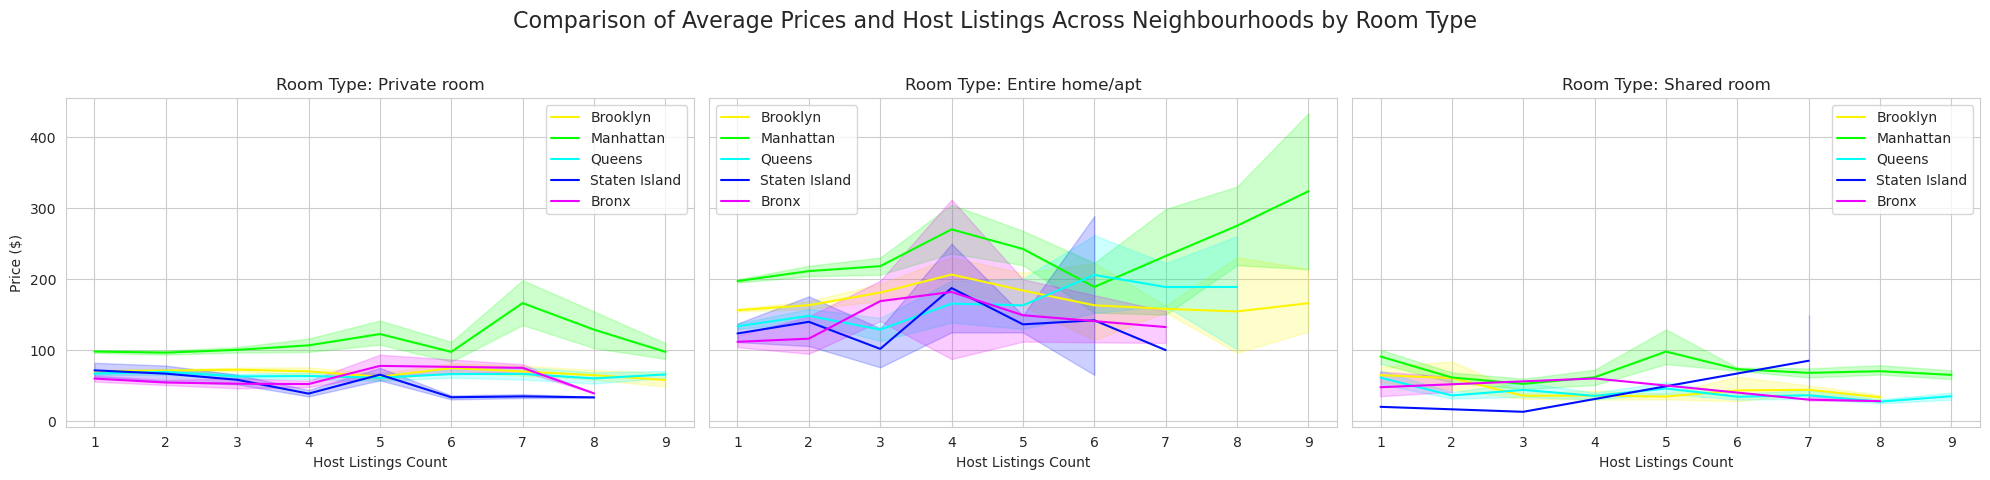

In [73]:
# plot line plots for the comparison of average prices and host listings across neighbourhoods by room type
room_types = df['room_type'].unique()[:3]  
neighbourhood_groups = df['neighbourhood_group'].unique()
sns.set_style('whitegrid')
palette = sns.color_palette("hsv", len(neighbourhood_groups))
fig, axes = plt.subplots(1, len(room_types), figsize=(20, 5), sharey=True)

for i, room_type in enumerate(room_types):
    room_data = df[df['room_type'] == room_type]
    for j, neighbourhood in enumerate(neighbourhood_groups):
        neighbourhood_data = room_data[room_data['neighbourhood_group'] == neighbourhood]
        sns.lineplot(
            data=neighbourhood_data,
            x='calculated_host_listings_count',
            y='price',
            ax=axes[i],
            label=neighbourhood,
            color=palette[j]  
        )
    axes[i].set_title(f'Room Type: {room_type}')
    axes[i].set_xlabel('Host Listings Count')
    if i == 0:
        axes[i].set_ylabel('Price ($)')

plt.suptitle('Comparison of Average Prices and Host Listings Across Neighbourhoods by Room Type', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  

plt.show()

The series of line plots represent the relationship between the host listings count and the average price for different types of accommodations — private rooms, entire homes/apartments, and shared rooms, in various New York City neighborhoods. 

For private rooms, the plot indicates that prices are relatively stable across hosts regardless of how many listings they manage, with slight variations across neighborhoods. Manhattan tends to have higher prices, with the price reaching higher when the hosts have more listings, which is consistent with its status as a highly sought-after area with more premium accommodation options. The other boroughs follow, showing less variability in price with increasing host listings, which might suggest that hosts with multiple listings do not significantly vary their pricing for private rooms.

In the case of entire homes or apartments, there's more fluctuation in price as hosts' listings count changes, especially in boroughs like Manhattan and Brooklyn, indicating a more dynamic pricing strategy that could be influenced by factors such as location desirability, property quality, and competition. Shared rooms show the least variation in price across neighborhoods and listing counts, likely reflecting their position as the most budget-friendly and least differentiated accommodation type.

Overall, these plots provide an economic snapshot of the short-term rental market's supply dynamics in New York City. They suggest that while some hosts specialize in offering multiple listings, which could be indicative of professional operations, this does not always translate into higher prices for consumers. The data also emphasizes the economic diversity of NYC's neighborhoods, with each borough exhibiting unique characteristics in its short-term rental market.

## 2.2 Maps and Interpretations

In [74]:
# convert the dataset to geodataframe
imp_df = df[['neighbourhood_group', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 
             'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].copy()
imp_df['geometry'] = list(zip(imp_df.longitude, imp_df.latitude))
imp_df['geometry'] = imp_df['geometry'].apply(Point)
imp_gdf = gpd.GeoDataFrame(imp_df, crs='EPSG:4326', geometry='geometry')

In [75]:
# obtain shapefile
zip_df = gpd.read_file("Modified Zip Code Tabulation Areas (MODZCTA).geojson")
zip_df.rename(columns = {'modzcta': 'zipcode'}, inplace = True)
zip_df.dropna(subset=['zipcode'], inplace=True)
zip_df['zipcode'] = zip_df['zipcode'].astype(int)

In [76]:
# merge dataset and shapefile
merged_data = gpd.sjoin(imp_gdf, zip_df, how='left', predicate='within')
merged_data.rename(columns = {'modzcta': 'zipcode'}, inplace = True)
merged_data.dropna(subset=['zipcode'], inplace=True)
merged_data['zipcode'] = merged_data['zipcode'].astype(int)
merged_data.dropna(inplace=True)
merged_data.head()

,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,geometry,index_right,zipcode,label,zcta,pop_est
0,Brooklyn,40.64749,-73.97237,149,1,9,0.21,6,365,POINT (-73.97237 40.64749),101.0,11218,11218,11218,74508
1,Manhattan,40.75362,-73.98377,225,1,45,0.38,2,355,POINT (-73.98377 40.75362),33.0,10036,10036,"10036, 10110",27428
5,Manhattan,40.74767,-73.97500,200,3,74,0.59,1,129,POINT (-73.97500 40.74767),14.0,10016,10016,10016,51057
10,Manhattan,40.80316,-73.96545,135,5,53,0.43,1,6,POINT (-73.96545 40.80316),23.0,10025,10025,10025,92805
18,Brooklyn,40.67592,-73.94694,99,3,53,4.44,1,21,POINT (-73.94694 40.67592),100.0,11213,11213,11213,66295


In [77]:
# calculate mean price, minimum nights, and host listings count for mapping
grouped_data = merged_data.groupby('zipcode').agg({
    'price': 'mean',
    'minimum_nights': 'mean',
    'calculated_host_listings_count': 'mean'
}).reset_index()
grouped_data = grouped_data.round(2)

map_gdf = gpd.GeoDataFrame(pd.merge(zip_df, grouped_data, left_on='zipcode', right_on='zipcode', how='left'))
map_gdf.dropna(inplace=True)
map_gdf.head()

,zipcode,label,zcta,pop_est,geometry,price,minimum_nights,calculated_host_listings_count
0,10001,"10001, 10118","10001, 10119, 10199",23072,"MULTIPOLYGON (((-73.98774 40.74407, -73.98819 ...",184.64,2.66,1.60
1,10002,10002,10002,74993,"MULTIPOLYGON (((-73.99750 40.71407, -73.99709 ...",153.77,2.69,1.41
2,10003,10003,10003,54682,"MULTIPOLYGON (((-73.98864 40.72293, -73.98876 ...",176.98,2.98,1.29
3,10026,10026,10026,39363,"MULTIPOLYGON (((-73.96201 40.80551, -73.96007 ...",125.08,2.62,1.48
4,10004,10004,10004,3028,"MULTIPOLYGON (((-74.00827 40.70772, -74.00937 ...",157.71,2.58,1.13


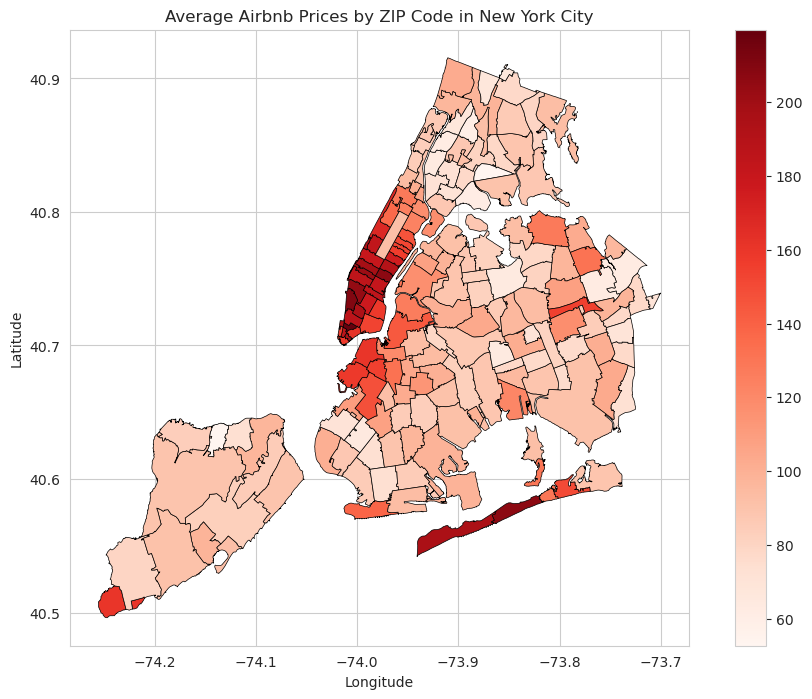

In [78]:
# plot average price by zipcode
fig, ax = plt.subplots(figsize=(12, 8))

map_gdf.plot(column='price', ax=ax, legend=True,
             legend_kwds={'orientation': "vertical"},
             cmap='Reds', edgecolor='black', linewidth=0.5)  

plt.title('Average Airbnb Prices by ZIP Code in New York City')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

This map illustrates the average Airbnb prices across different ZIP codes in New York City. This visualization can be interpreted to reflect the varying value of short-term rental properties correlated with location-specific factors. Areas with darker reds, likely representing high-demand neighborhoods, might command higher prices due to their proximity to attractions, business centers, or other amenities. Listings in Manhattan have the highest average prices. In contrast, lighter areas suggest more affordable options, which could be further from city hotspots or less frequented by tourists. Listings in Bronx have the lowest average prices. This map is a valuable tool for both hosts to competitively price their rentals and for guests seeking accommodation that meets their budget and location preferences.

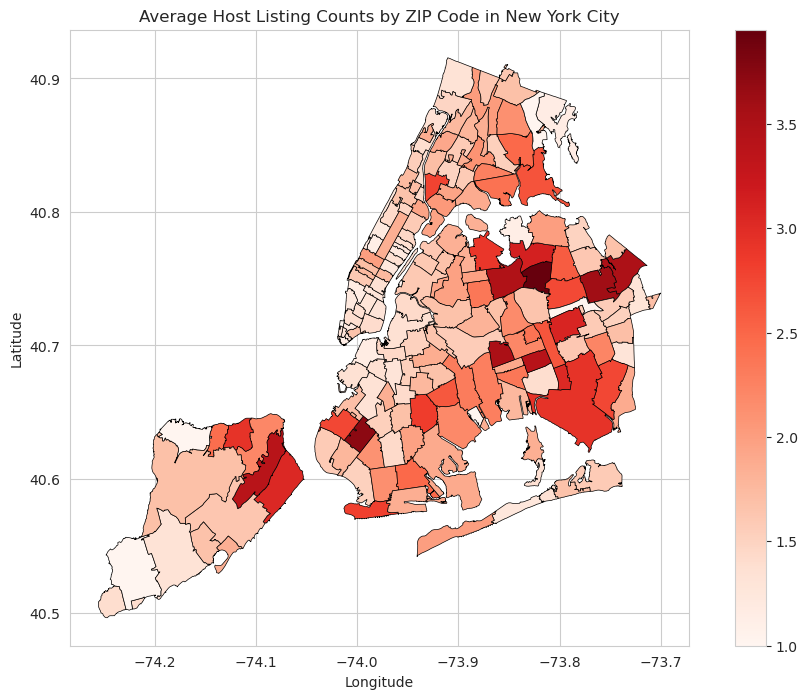

In [79]:
# plot average host listings count by zipcode
fig, ax = plt.subplots(figsize=(12, 8))

map_gdf.plot(column='calculated_host_listings_count', ax=ax, legend=True,
             legend_kwds={'orientation': "vertical"},
             cmap='Reds', edgecolor='black', linewidth=0.5)  

plt.title('Average Host Listing Counts by ZIP Code in New York City')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

The map depicts the average host listings count within various ZIP codes in New York City. Darker areas suggest a concentration of hosts who likely manage multiple properties, potentially indicating professional or semi-professional hosts who are more business-oriented. Hosts in Queens have the highest listings count. Lighter areas could imply that hosts are more likely to offer a single property, suggesting a more casual or individual involvement in the Airbnb market. Hosts in Manhattan have the lowest listings count. This distribution can reflect the economic dynamics of the city's short-term rental market, with some areas being more commercially driven with a larger number of listings per host, which could affect both the availability and type of accommodations for guests.

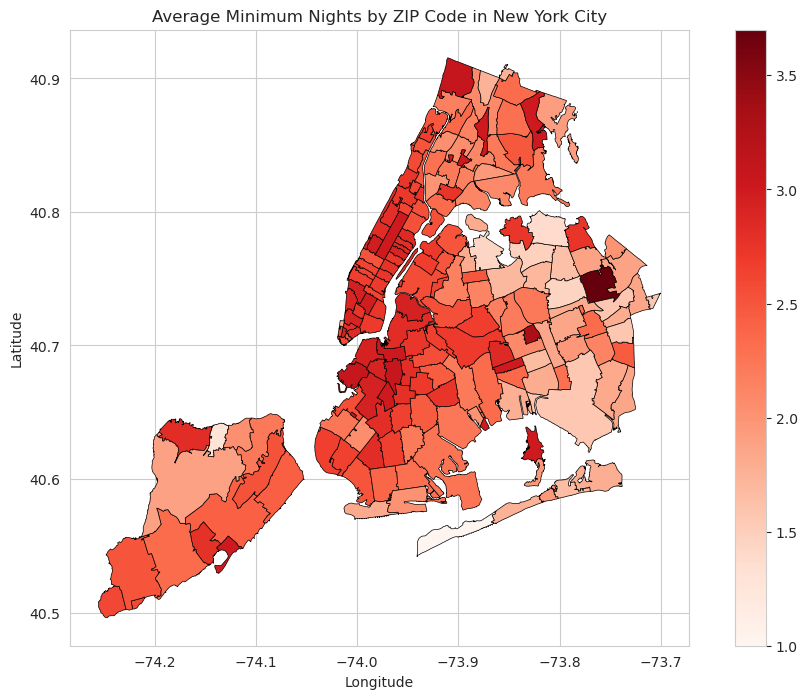

In [80]:
# plot average minimum nights by zipcode
fig, ax = plt.subplots(figsize=(12, 8))

map_gdf.plot(column='minimum_nights', ax=ax, legend=True,
             legend_kwds={'orientation': "vertical"},
             cmap='Reds', edgecolor='black', linewidth=0.5)  

plt.title('Average Minimum Nights by ZIP Code in New York City')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

The map illustrates the average minimum nights for Airbnb listings across different ZIP codes in New York City. Darker shades indicate areas with a higher average minimum number of nights required to book a stay, suggesting that hosts in these areas are potentially targeting guests seeking longer-term accommodations, which might be due to local regulations, market demand, or host preference. Listings in Manhattan require the highest minimum nights. Areas with lighter shades have a lower minimum stay requirement, which may appeal to travelers looking for short-term stays. Listings in Queens mostly require the lowest minimum nights, except one specific area where the minimum night requirement is more than 3.5 nights. This visualization helps to understand the economic landscape of short-term rentals in New York City, indicating how the market adapts to different consumer needs, which could be influenced by factors like tourist attractions, business centers, or cultural events in various neighborhoods.

# 3. Project Three 

## 3.1. Potential Data to Scrape

One of the main factors that  an significantly impact Airbnb pricing is neighborhood characteristics, including safety scores, noise levels, proximity to public transportation, and local amenities. For example, the website WalkScore.com provides walk score, bike score and transit score for any location. By scraping this information, I can merge this new data with the existing Airbnb in NYC dataset by matching the neigbourhood or latitude/longitude coordinates of the listings. Then, I can create additional features for each Airbnb listing, such as walk_score, bike_score, and transit_score to assess the impact of walkability and transport accessibility on rental prices. This data can be useful as it determines the location desirability, beyond mere geographical coordinates. It offers a measure of how the convenience of a listing's location influences its price. This is crucial because guests often consider the ease of getting around when choosing accommodations which leads to higher demand for specific areas, and hosts may price their listings higher in areas with better accessibility and amenities. Furthermore, the analysis could be expanded to investigate if listings with high walk scores can still command high prices even with fewer reviews or a higher minimum stay requirement, thus providing a more nuanced understanding of pricing strategies. This approach could unveil a layer of pricing dynamics influenced by location convenience, potentially leading to more effective pricing models for hosts.

## 3.2. Potential Challenges

A potential challege with scraping data from websites like WalkScore.com is the presence of API Access and Costs, in which they charge for access or require an API key, which could have associated costs or usage restrictions.
Especially since Airbnb listings and neighborhood characteristics can change over time, it may be necessary to scrape data periodically to ensure up-to-date information. The cost and limited access of API-based scraping can be a barrier to this, limiting the scale or frequency of data collection. I have to ensure the cost of data acquisition doesn't outweigh the benefits. 

Another potential challenge with scraping data is that some websites have terms of service that may limit or prohibit scraping, which might lead to serious legal consequences. It's crucial to review WalkScore.com’s terms of service and scraping policy to ensure compliance.



## 3.3. Scraping Data from a Website

Since scraping data from WalkScore.com can be challenge at this point, I have decided to use on of the practice websites to get data on New York Zip Codes by Population. This data can provide valuable insights into the density and demand factors within different areas, which are likely to influence Airbnb pricing. A higher population density in a given zip code might correlate with increased demand for accommodation, leading to higher prices, especially in areas where hotel availability is limited. 

To scrape the data on New York Zip Codes, I firstly need to send a request to the webpage and receive the HTML content in return. I then need to use BeautifulSoup, a library for parsing HTML data, to look for the specific table that I am interested in. Once the table is located, information on zip code and population will be extracted and stored in a DataFrame. 

In [81]:
# parsing HTML and accessing different elements
import requests
from bs4 import BeautifulSoup

url = 'https://www.newyork-demographics.com/zip_codes_by_population'
response = requests.get(url)

In [82]:
# manipulating it into a tabular structure
soup_object = BeautifulSoup(response.text, 'html.parser')
data_table = soup_object.find_all('table', 'ranklist table')[0]
all_values = data_table.find_all('tr')

In [83]:
# extract column names
scrape_df = pd.DataFrame(columns = ['zipcode', 'population']) # create an empty dataframe
ix = 0 # initialise index to zero
all_values[1]

for row in all_values[1:1776]:
    values = row.find_all('td') # extract all elements with tag <td>
    # pick only the text part from the <td> tag
    zipcode = values[1].text.replace('\n', '').strip()
    population = values[2].text.replace('\n', '').replace(',', '').strip()
    scrape_df.loc[ix] = [int(zipcode), int(population)]  # Convert to int here
    ix += 1
    
scrape_df.head()

,zipcode,population
0,11368,112750
1,11208,108180
2,11385,105521
3,11373,102618
4,11226,101053


In the step below, I will merge the NYC population scraped data to the existing Airbnb in NYC dataset, to assess the correlation of population and some Airbnb key factors, such as price, minimum nights, host listings count, and number of reviews. 

In [84]:
# merge the scraped dataset with merged dataset
new_merged_data = pd.merge(merged_data, scrape_df, how='outer', on='zipcode')
new_merged_data.dropna(inplace=True)
new_merged_data

,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,geometry,index_right,zipcode,label,zcta,pop_est,population
0,Brooklyn,40.64749,-73.97237,149.0,1.0,9.0,0.21,6.0,365.0,POINT (-73.97237 40.64749),101.0,11218,11218,11218,74508,73318.0
1,Brooklyn,40.65599,-73.97519,60.0,1.0,19.0,1.37,2.0,85.0,POINT (-73.97519 40.65599),101.0,11218,11218,11218,74508,73318.0
2,Brooklyn,40.64106,-73.97426,39.0,1.0,45.0,0.46,2.0,365.0,POINT (-73.97426 40.64106),101.0,11218,11218,11218,74508,73318.0
3,Brooklyn,40.64302,-73.97255,39.0,1.0,82.0,0.94,2.0,365.0,POINT (-73.97255 40.64302),101.0,11218,11218,11218,74508,73318.0
4,Brooklyn,40.64277,-73.97296,60.0,2.0,20.0,0.42,1.0,347.0,POINT (-73.97296 40.64277),101.0,11218,11218,11218,74508,73318.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30057,Queens,40.76212,-73.71928,32.0,3.0,1.0,0.14,1.0,88.0,POINT (-73.71928 40.76212),135.0,11362,11362,11362,18721,18426.0
30058,Staten Island,40.54790,-74.21017,75.0,3.0,21.0,1.69,1.0,59.0,POINT (-74.21017 40.54790),56.0,10309,10309,10309,33531,34740.0
30059,Staten Island,40.52293,-74.21238,85.0,2.0,8.0,3.33,1.0,66.0,POINT (-74.21238 40.52293),56.0,10309,10309,10309,33531,34740.0
30060,Queens,40.56605,-73.86994,195.0,1.0,4.0,0.35,2.0,160.0,POINT (-73.86994 40.56605),176.0,11697,11697,11697,3540,3946.0


## 3.4. Visualizing the Scraped Dataset

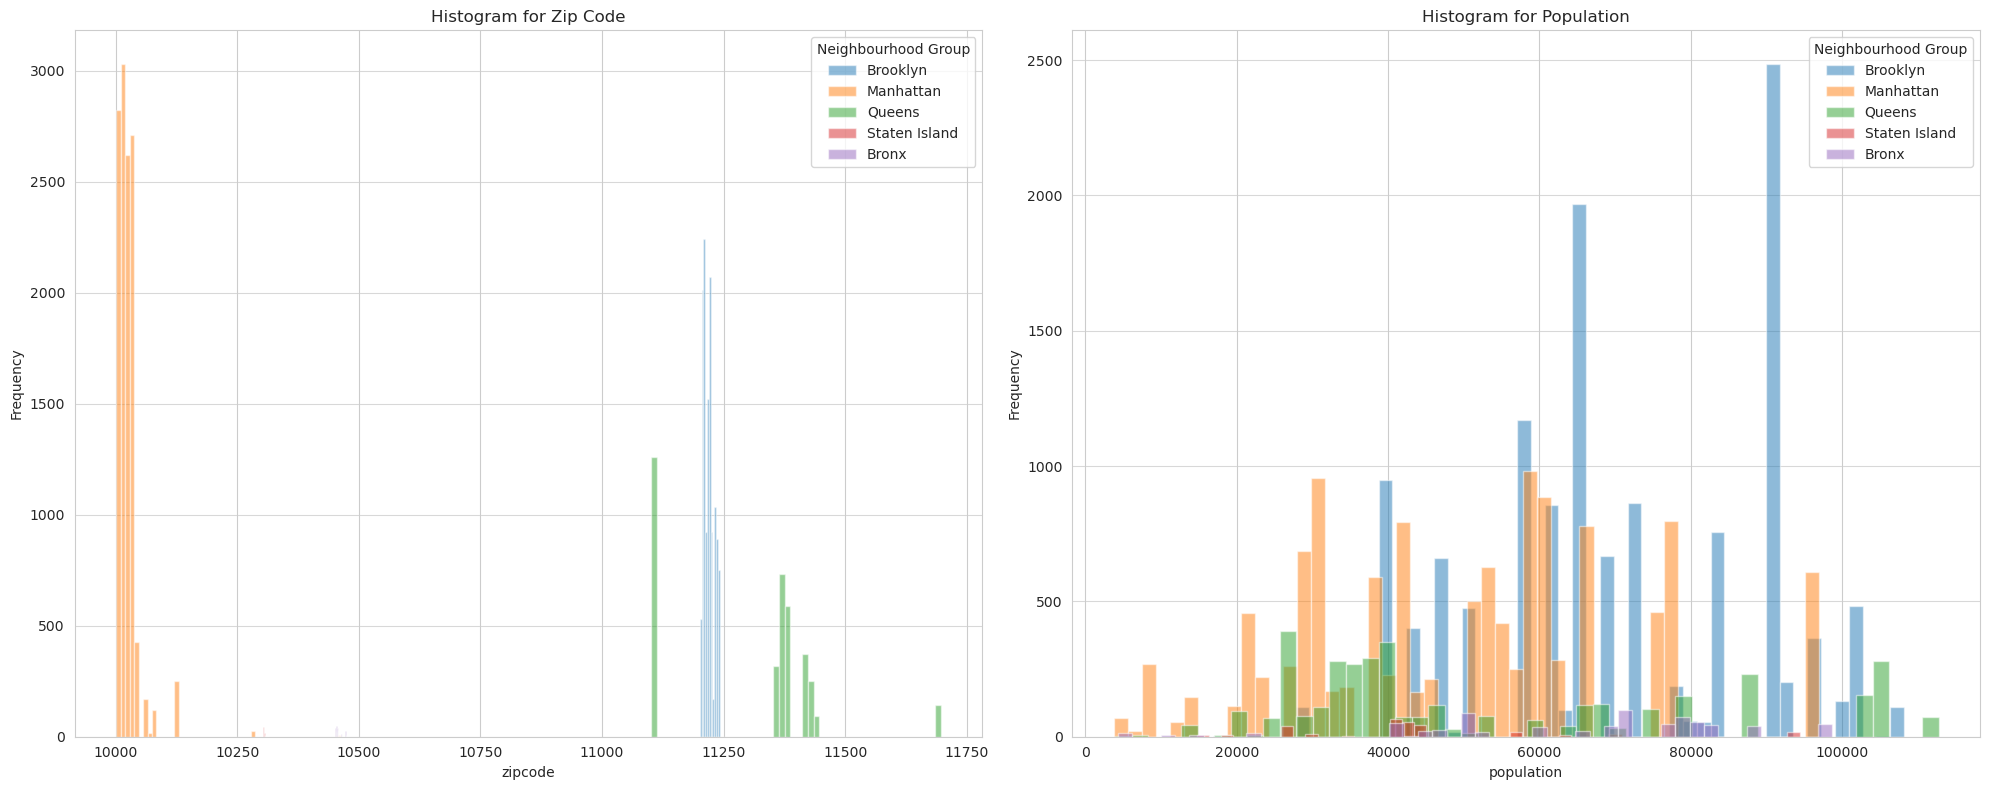

In [85]:
# plot histogram for zip code and histogram for population
columns = ['zipcode', 'population']
titles = ['Histogram for Zip Code', 'Histogram for Population']
neighbourhood_groups = new_merged_data['neighbourhood_group'].unique()  

fig, axs = plt.subplots(1, 2, figsize=(20, 8))
axs = axs.ravel()

for i, col in enumerate(columns):
    for group in neighbourhood_groups:
        group_data = new_merged_data[new_merged_data['neighbourhood_group'] == group]
        axs[i].hist(group_data[col], bins=50, alpha=0.5, label=str(group))
    
    axs[i].set_title(titles[i])
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')
    axs[i].grid(axis='y', alpha=0.75)
    axs[i].legend(title='Neighbourhood Group')

plt.tight_layout()
plt.show()

The first histogram illustrates the distribution of Airbnb listings across various zip codes, differentiated by neighbourhood group. The concentration of bars at the lower end of the x-axis suggests that a larger number of Airbnb listings are found in Manhattan, with a moderate amount of listings in Brooklyn and Queens, and a very limited amount of listings in Staten Island and Bronx. It is shown that the distribution is not uniform across the zip codes and neighbourhood groups, with certain neighbourhood groups having a significantly higher number of listings, indicated by the taller bars.

The second histogram presents the population distribution within these zip codes, again segmented by neighborhood group. This histogram helps visualize how densely populated each area is, with some neighborhood groups, such as Brooklyn, Manhattan, and Queens, appear to have a higher number of densely populated areas, as seen by bars extending towards the higher end of the population axis. The spread and height of the bars indicate the variety in population size across different areas, with Brooklyn mostly having higher population size, while Manhattan and Queens' population sizes being less varied.  

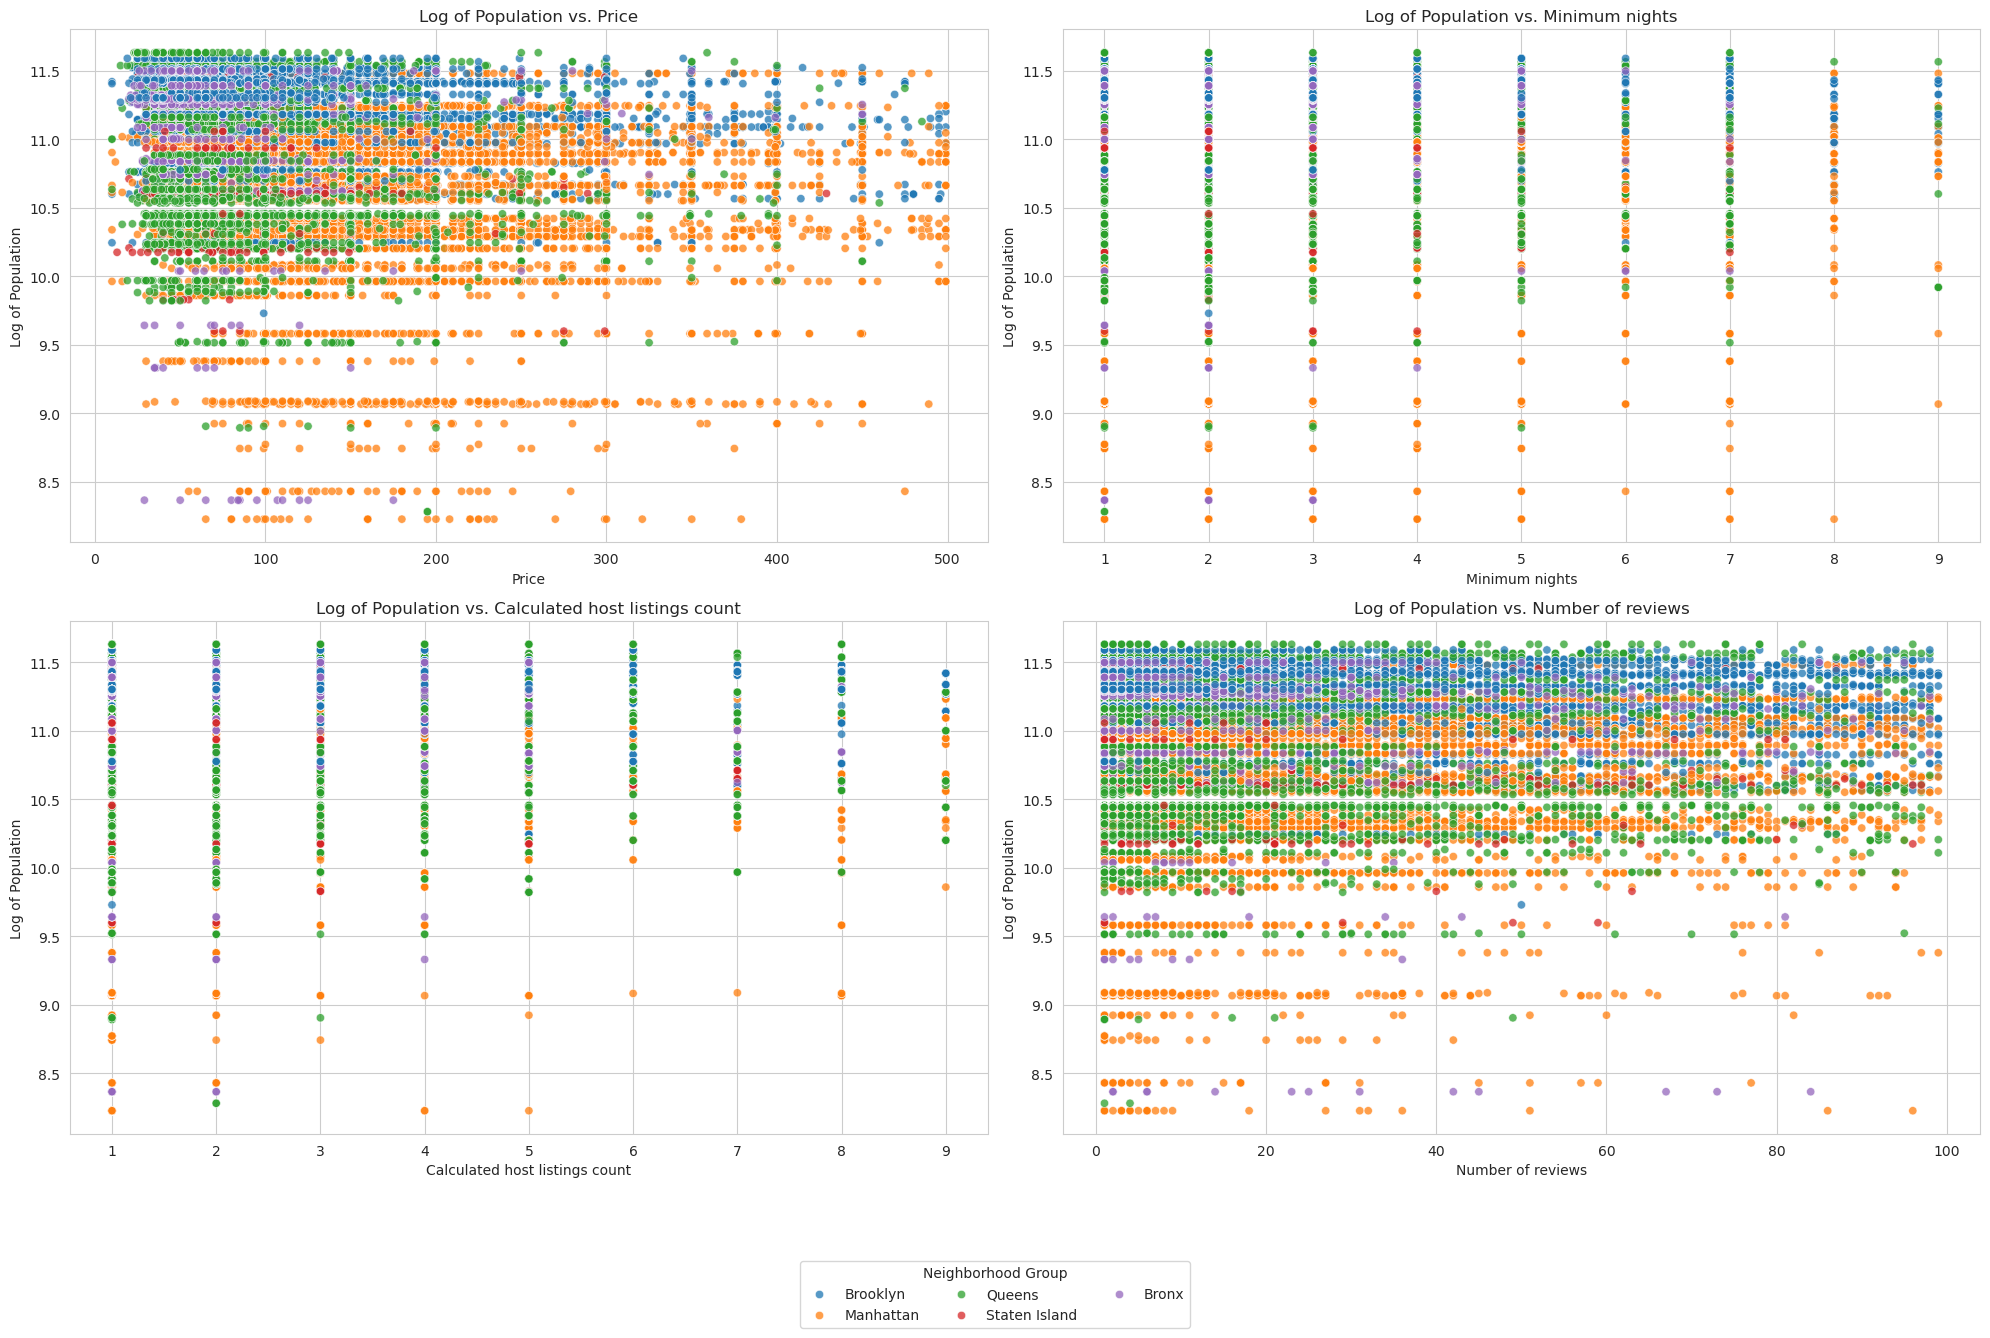

In [86]:
# plot scatter plots
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x_variables = ['price', 'minimum_nights', 'calculated_host_listings_count', 'number_of_reviews']

fig, axs = plt.subplots(2, 2, figsize=(20, 12))  

log_population = np.log(new_merged_data['population'])  

flat_axs = axs.flatten()

for i, ax in enumerate(flat_axs):
    if i < len(x_variables):
        sns.scatterplot(x=new_merged_data[x_variables[i]], y=log_population,
                        hue=new_merged_data['neighbourhood_group'], alpha=0.75, ax=ax)
        ax.set_title(f'Log of Population vs. {x_variables[i].replace("_", " ").capitalize()}')
        ax.set_xlabel(x_variables[i].replace("_", " ").capitalize())
        ax.set_ylabel('Log of Population')
        ax.grid(True)
    else:
        ax.set_visible(False)

handles, labels = flat_axs[0].get_legend_handles_labels()

for ax in flat_axs:
    ax.legend([],[], frameon=False)

fig.legend(handles, labels, title='Neighborhood Group', loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)

plt.tight_layout()
plt.subplots_adjust(bottom=0.05)  
plt.show()

In the first graph, the scatter plot of the log of population versus price shows a dispersion of points that does not indicate a clear linear trend. The distribution suggests that in more populated neighborhoods, Airbnb listings are available at a wide range of prices, with prices mostly range under \\$300. Premium listings of above \\$300  are mostly concentrated around Manhattan, with a few being located in Brooklyn and Queens. Bronx and Staten Island areas are more budget friendly, with most listings under \\$150. This could imply that population density alone is not a strong predictor of Airbnb pricing, and that guests in dense neighborhoods can find accommodations across various price points.

The second graph illustrates the relationship between the log of population and the minimum number of nights required for an Airbnb stay. The points are clustered by the distinct minimum nights of under 5 nights, showing a somewhat uniform distribution across different population densities. This suggests that hosts across neighborhoods with varying populations have similar policies regarding the length of stay, indicating that other factors may influence minimum stay requirements more than the size of the local population.

The third graph depicts the correlation between the log of population and the number of listings a host manages. The relatively vertical lines of dots suggest that regardless of the population size of a neighborhood, there are hosts with various numbers of listings, from single listings to multiple properties. This may imply that there is a mix of individual and professional hosts across all areas, mostly with individual hosts having around 1-2 listings.

Finally, the fourth graph portrays the log of population against the number of reviews. The points spread widely, suggesting that listings in more populous areas do not necessarily have a higher number of reviews. Overall, more populated areas in Manhattan, Brooklyn and Queens receive a large amount of reviews, with Manhattan still receveing a moderate amount of reviews even in less-populated areas. This could mean that factors other than just population density, such as the quality of the listing or its popularity among tourists, play a significant role in how often it is reviewed.

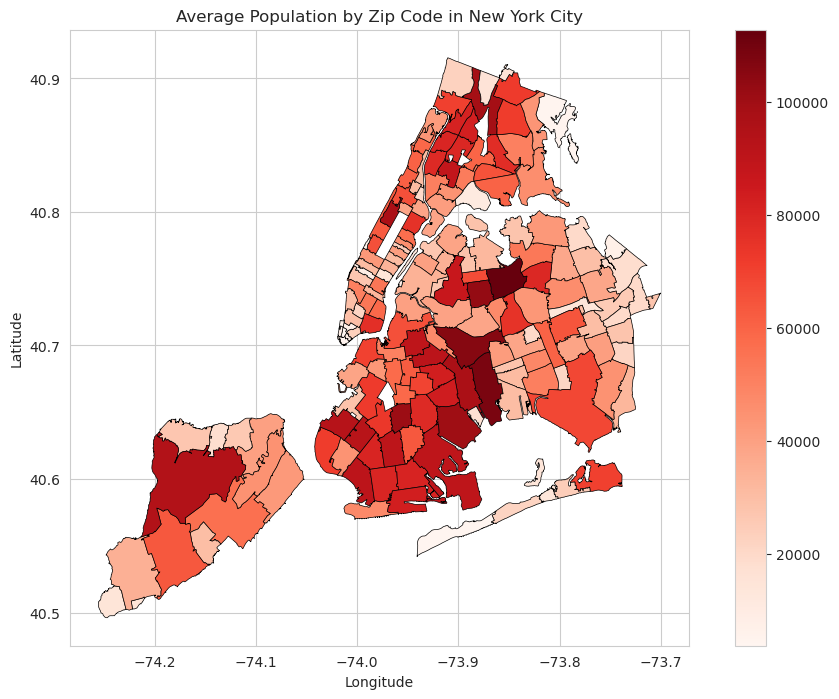

In [87]:
# plot average population by zip code in nyc
average_population_by_zip = new_merged_data.groupby('zipcode').agg({'population':'mean'}).reset_index()
mapped_data = zip_df.merge(average_population_by_zip, on='zipcode', how='left')

fig, ax = plt.subplots(figsize=(12, 8))
mapped_data.plot(column='population', ax=ax, legend=True,
                 legend_kwds={'orientation': "vertical"},
                 cmap='Reds', edgecolor='black', linewidth=0.5)

plt.title('Average Population by Zip Code in New York City')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

This map visualizes the average population across different zip codes in New York City. Areas with darker shades represent zip codes with higher average populations (Brooklyn seems to be the most populated), while lighter shades indicate areas with fewer residents. This could suggest areas with higher demand for goods, services, and housing, given the larger number of residents. For an Airbnb host, the map highlights potential hotspots where a high concentration of people could equate to greater demand for short-term rentals. Conversely, it also points out less populated areas where the market for rentals might be less competitive or saturated. Understanding population distribution is crucial for Airbnb hosts to determine a suitable pricing strategy.

## 3.5. Adding a New Dataset

In [88]:
# adding a new dataset and change the column name
census_df = pd.read_csv('nyc_census_tracts.csv')
census_df.rename(columns={'Borough': 'neighbourhood_group'}, inplace=True)
census_df.dropna(inplace=True)

## 3.6. Conclusion 

In conclusion, our investigation into the Airbnb marketplace in New York City underscores the complexity of pricing strategies. Our findings indicate that while traditional economic principles of supply and demand hold true, the short-term rental market is also deeply influenced by a myriad of other factors. The analysis suggests that hosts price their offerings not just based on the availability and demand for accommodations, but also in response to the unique characteristics of their neighborhoods—local attractions, accessibility to transport, or the general safety and desirability of the area.

The interplay between the number of listings a host manages and the price of these listings points to a market that caters to a diverse range of consumers, from budget-conscious travelers to those seeking premium experiences. This enables varied options for guests and investment opportunities for hosts. Additionally, the correlation between the density of an area and the pricing of rentals illuminates the ways in which urban economics operate within the realm of short-term housing. Listings in densely populated areas do not always equate to higher prices, suggesting that other factors like competitive pricing, guest preferences, and regulatory frameworks are at play.

The research conducted offers valuable insights for both market participants and policymakers. For hosts, understanding these dynamics can lead to more informed pricing decisions that maximize occupancy and profitability. For guests, it highlights the importance of thorough research when selecting accommodations. 

Looking ahead, for a more comprehensive understanding, further analysis could incorporate real-time data on local events, seasonal tourism patterns, and economic indicators like employment rates or neighborhood investment indices. Additionally, conducting a comparative analysis with other cities could offer a broader perspective on urban short-term rental economies, determining different local trends.